In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Logistic Regression and Classification

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

print(tf.__version__)

2.4.1


# Data Distribution

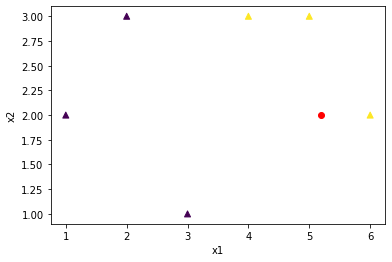

In [6]:
x_train = [[1., 2.], [2., 3.], [3., 1.], [4., 3.], [5., 3.], [6., 2.]]
y_train = [[0.], [0.], [0.], [1.], [1.], [1.]]

x_test = [[5.2, 2.]]
y_test = [[1.]]

x1 = [x[0] for x in x_train] # 1, 2, 3, ...
x2 = [x[1] for x in x_train] # 2, 3, 1, ...


colors = [int(y[0] % 3) for y in y_train]
plt.scatter(x1, x2, c=colors, marker='^')
plt.scatter(x_test[0][0], x_test[0][1], c='red')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# Sigmoid function & Cost function

$$
Sigmoid(x) = 1 / (1 + e^{-z})
$$

$$
Cost(h(x), y) = -ylog(h(x)) - (1-y)log(1-h(x))
$$

In [28]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

W = tf.Variable(tf.zeros([2,1]), name='weight') # 2행 1열
b = tf.Variable(tf.zeros([1]), name='bias')

def logistic_regression(features):
    # Sigmoid function
    hypothesis = tf.divide(1., 1. + tf.exp(-tf.matmul(features, W) + b))
    return hypothesis # float value

def cost_function(hypothesis, labels):
    # Cost(Loss) function
    cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

def get_gradient(features, labels):
    with tf.GradientTape() as tape:
        hypothesis = logistic_regression(features)
        cost = cost_function(hypothesis, labels) # loss
    return tape.gradient(cost, [W, b])

def accuracy_function(hypothesis, labels):
    # Decision Boundary(>0.5)
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32) # 0 or 1
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
    return accuracy

# Training

In [29]:
epochs = 1001
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

for epoch in range(epochs):
    for features, labels in iter(dataset.batch(len(x_train))):
        hypothesis = logistic_regression(features)
        gradient = get_gradient(features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(gradient, [W,b]))

        if epoch % 100 == 0:
            print("Iter: {}, Loss(Cost): {:.4f}".format(epoch, cost_function(hypothesis, labels)))

test_acc = accuracy_function(logistic_regression(x_test), y_test)
print("Test Result = {}".format(tf.cast(logistic_regression(x_test) > 0.5, dtype=tf.int32)))
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss(Cost): 0.6931
Iter: 100, Loss(Cost): 0.5781
Iter: 200, Loss(Cost): 0.5352
Iter: 300, Loss(Cost): 0.5056
Iter: 400, Loss(Cost): 0.4840
Iter: 500, Loss(Cost): 0.4673
Iter: 600, Loss(Cost): 0.4537
Iter: 700, Loss(Cost): 0.4421
Iter: 800, Loss(Cost): 0.4320
Iter: 900, Loss(Cost): 0.4229
Iter: 1000, Loss(Cost): 0.4145
Test Result = [[1]]
Testset Accuracy: 1.0000
